In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
#deklarace promennych
var("k");
assume(k,'integer')
t, tau, T_0, h = var("t, tau, T_0, h");
pocet_harmonickych = 10;
h_num = 5;
T_0_num = 4;
tau_num = 0.5 * T_0_num;
f_0_num = 1 / T_0_num;
f_0 = 1/T_0
#definice signalu
x = h_num*(heaviside(t+1)-heaviside(t-1))


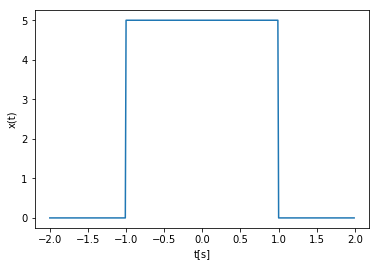

In [2]:
#vykresleni signalu
vektor_t = np.arange(-tau_num,tau_num, 1/100)

x_num = []
for p in vektor_t:
    x_num.append(x.substitute(t=p))

plt.plot(vektor_t, x_num)
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.savefig('sagesignal.png')

In [3]:
c_0 = 1/T_0 * integrate(h, t, -tau/2, tau/2); c_0

h*tau/T_0

In [4]:
c_0_num = c_0.subs(h=h_num);
c_0_num = c_0_num.subs(T_0=T_0_num);
c_0_num = c_0_num.subs(tau=tau_num)
c_0_num

2.50000000000000

In [5]:
c_k = 1/T_0 * integrate(h * exp(-1*i * 2*pi*f_0 * k * t),t, -tau/2, tau/2); c_k_simp = c_k.full_simplify(); c_k_simp

h*sin(pi*k*tau/T_0)/(pi*k)

In [6]:
c_k_nnum = c_k_simp.subs(h=h_num);
c_k_nnum = c_k_nnum.subs(T_0=T_0_num);
c_k_nnum = c_k_nnum.subs(tau=tau_num);
c_k_nnum

5*sin(0.500000000000000*pi*k)/(pi*k)

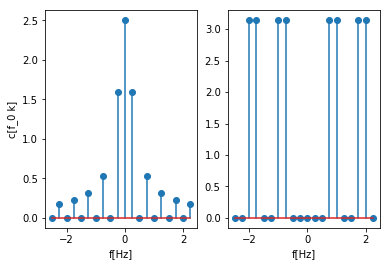

In [7]:
vektor_k_num = np.arange(-pocet_harmonickych, pocet_harmonickych, 1)
vektor_f_num = f_0_num * vektor_k_num
#koeficienty fourierovy rady v komplexnim tvaru
c_k_num = []
abs_c_k_num = []
angle_c_k_num = []
for kk in vektor_k_num:
    if (kk==0):
        c_k_num.append(limit(c_k_nnum, k=kk))
        abs_c_k_num.append(abs(limit(c_k_nnum, k=kk)))
        angle_c_k_num.append(arctan2(imag_part(limit(c_k_nnum, k=kk)), real_part(limit(c_k_nnum, k=kk)) ) )
    else:
        c_k_num.append(c_k_nnum.substitute(k=kk))
        abs_c_k_num.append(abs(c_k_nnum.substitute(k=kk)))
        angle_c_k_num.append(arctan2(imag_part(c_k_nnum.substitute(k=kk)), real_part(c_k_nnum.substitute(k=kk)) ) )
plt.subplot(121);
plt.xlabel('f[Hz]')
plt.ylabel('c[f_0 k]')
plt.stem(vektor_f_num, abs_c_k_num);
plt.savefig('sagemspektrum.png')
plt.subplot(122);
plt.xlabel('f[Hz]')
plt.stem(vektor_f_num, angle_c_k_num);
plt.savefig('sagefspektrum.png')

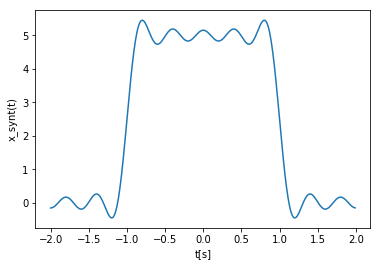

In [8]:
#synteza signalu z komplexnich koeficientu
x_synt_kompl = 0
x_synt_kompl = c_0_num
for kk in range(1,pocet_harmonickych):
    x_synt_kompl +=(c_k_nnum.subs(k=-kk)*exp(1j*2*np.pi*f_0_num*(-kk)*vektor_t)+c_k_nnum.subs(k=kk)*exp(1j*2*np.pi*f_0_num*(kk)*vektor_t));
plt.plot(vektor_t,x_synt_kompl)
plt.xlabel('t[s]')
plt.ylabel('x_synt(t)')
plt.savefig('sagesynteza.png')

In [9]:
del c_k_num,x_synt_kompl

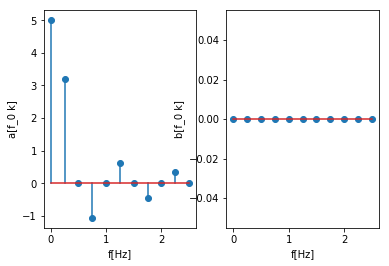

In [10]:
#koeficienty v realnem tvaru
vektor_k_num_real = np.arange(0, pocet_harmonickych+1, 1)
vektor_f_num_real = f_0_num * vektor_k_num_real
a_0 = c_0_num*2;
a_k = (2*real(c_k_nnum))
b_k = (-2*imag(c_k_nnum))
a_k_num = []
b_k_num = []
for kk in vektor_k_num_real:
    if (kk==0):
        a_k_num.append(limit(a_k, k=kk))
        b_k_num.append(limit(b_k, k=kk))
    else:
        a_k_num.append(a_k.substitute(k=kk))
        b_k_num.append(b_k.substitute(k=kk))

plt.subplot(121);
plt.xlabel('f[Hz]')
plt.ylabel('a[f_0 k]')
plt.stem(vektor_f_num_real, a_k_num);
plt.subplot(122);
plt.xlabel('f[Hz]')
plt.ylabel('b[f_0 k]')
plt.stem(vektor_f_num_real, b_k_num);

Text(0,0.5,'x_synt(t)')

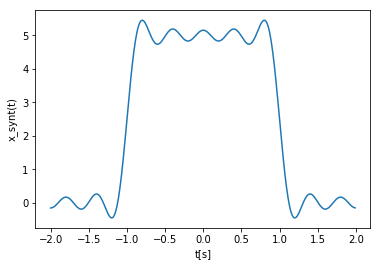

In [11]:
#synteza signalu z koeficientu fourierovy rady v realnem tvaru
x_synt_real = a_0/2
kk=1
for kk in range(1,pocet_harmonickych):
    x_synt_real = x_synt_real + a_k_num[kk] * cos(2*np.pi*f_0_num*kk*vektor_t) + b_k_num[kk] * sin(2*np.pi*f_0_num*kk*vektor_t)
plt.plot(vektor_t,x_synt_real)
plt.xlabel('t[s]')
plt.ylabel('x_synt(t)')

In [12]:
del a_0,a_k,a_k_num,b_k,b_k_num,x_synt_real

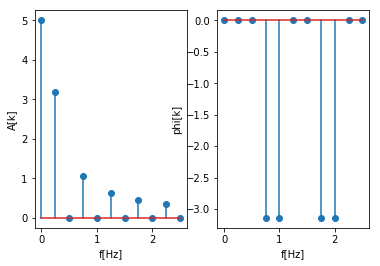

In [14]:
#koeficienty v I. elektrotechnickem tvaru c_k => A_k, phi_k
A_0 = c_0_num
A_k = 2*abs(c_k_nnum)
A_k_num = []
phi_k_num = []
for kk in vektor_k_num_real:
    if (kk==0):
        A_k_num.append(limit(A_k, k=kk))
        phi_k_num.append(-arctan2(imag(limit(c_k_nnum, k=kk)),real(limit(c_k_nnum, k=kk))))
    else:
        A_k_num.append(A_k.substitute(k=kk))
        phi_k_num.append(-arctan2(imag(c_k_nnum.substitute(k=kk)),real(c_k_nnum.substitute(k=kk))))
plt.subplot(121);
plt.xlabel('f[Hz]')
plt.ylabel('A[k]')
plt.stem(vektor_f_num_real, A_k_num);
plt.subplot(122);
plt.xlabel('f[Hz]')
plt.ylabel('phi[k]')
plt.stem(vektor_f_num_real, phi_k_num);

Text(0,0.5,'x_synt(t)')

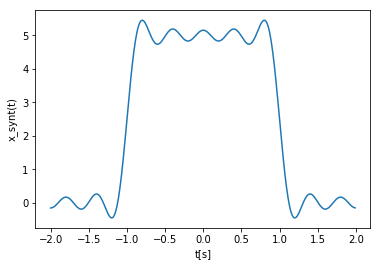

In [15]:

#synteza z I. elektrotechnickeho tvaru
x_synt_I_elt = A_0
for kk in range(1,pocet_harmonickych):
    x_synt_I_elt = x_synt_I_elt + A_k_num[kk] * cos(2*np.pi*f_0_num * kk *vektor_t - phi_k_num[kk])
plt.plot(vektor_t,x_synt_I_elt)
plt.xlabel('t[s]')
plt.ylabel('x_synt(t)')

In [16]:
del A_0,A_k,A_k_num,phi_k_num,x_synt_I_elt

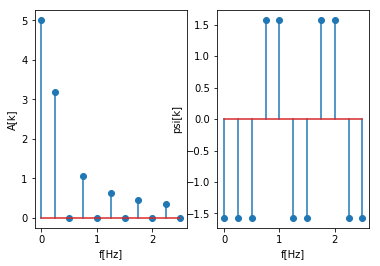

In [17]:
#II. elekt. tvar c_k => A_k, psi_k
A_0 = c_0_num
A_k = 2*abs(c_k_nnum)
A_k_num = []
psi_k_num = []
for kk in vektor_k_num_real:
    if (kk==0):
        A_k_num.append(limit(A_k, k=kk))
        psi_k_num.append(-arctan2(imag(1j*limit(c_k_nnum, k=kk)),real(1j*limit(c_k_nnum, k=kk))))
    else:
        A_k_num.append(A_k.substitute(k=kk))
        psi_k_num.append(-arctan2(imag(1j*c_k_nnum.substitute(k=kk)),real(1j*c_k_nnum.substitute(k=kk))))
plt.subplot(121);
plt.xlabel('f[Hz]')
plt.ylabel('A[k]')
plt.stem(vektor_f_num_real, A_k_num);
plt.subplot(122);
plt.xlabel('f[Hz]')
plt.ylabel('psi[k]')
plt.stem(vektor_f_num_real, psi_k_num);

Text(0,0.5,'x_synt(t)')

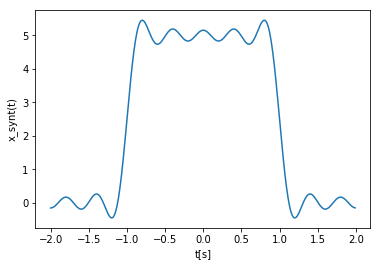

In [18]:
#synteza z II. elekt. tvaru
x_synt_II_elt = A_0
for kk in range(1,pocet_harmonickych):
    x_synt_II_elt = x_synt_II_elt + A_k_num[kk] * sin(2*np.pi*f_0_num * kk *vektor_t - psi_k_num[kk])
plt.plot(vektor_t,x_synt_II_elt)
plt.xlabel('t[s]')
plt.ylabel('x_synt(t)')

In [19]:
del x_synt_II_elt,A_k_num,psi_k_num,A_0,A_k

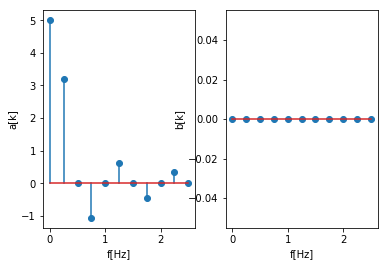

In [20]:
#Koeficienty fourierovy rady v realnem tvaru
a_0 = 2* 1/T_0_num * integrate(h_num,t,-tau_num/2, tau_num/2)
a_k = 2* 1/T_0_num * integrate(h_num*cos(2*np.pi*f_0_num*k*t),t,-tau_num/2,tau_num/2)
b_k = 2* 1/T_0_num * integrate(h_num*sin(2*np.pi*f_0_num*k*t),t,-tau_num/2,tau_num/2)
a_k_num = []
b_k_num = []
for kk in vektor_k_num_real:
    if (kk==0):
        a_k_num.append(limit(a_k, k=kk))
        b_k_num.append(limit(b_k, k=kk))
    else:
        a_k_num.append(a_k.substitute(k=kk))
        b_k_num.append(b_k.substitute(k=kk))
plt.subplot(121);
plt.stem(vektor_f_num_real, a_k_num);
plt.xlabel('f[Hz]')
plt.ylabel('a[k]')
plt.subplot(122);
plt.xlabel('f[Hz]')
plt.ylabel('b[k]')
plt.stem(vektor_f_num_real,b_k_num);

Text(0,0.5,'x_synt(t)')

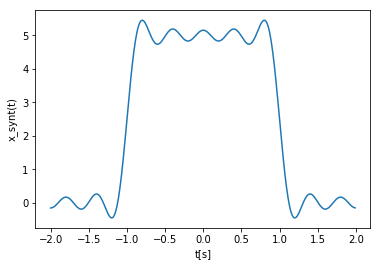

In [21]:
#synteza z realneho tvaru
x_synt_real = a_0/2
for kk in range(1,pocet_harmonickych):
    x_synt_real = x_synt_real +a_k.subs(k=kk)*cos(2*np.pi*f_0_num*kk*vektor_t)+b_k.subs(k=kk)*sin(2*np.pi*f_0_num*kk*vektor_t)
plt.plot(vektor_t,x_synt_real)
plt.xlabel('t[s]')
plt.ylabel('x_synt(t)')

In [22]:
del a_k_num,b_k_num,x_synt_real

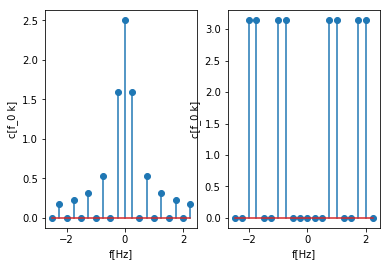

In [23]:
#Koeficienty Fourierovy rady v komplexnim tvaru a_k,b_k => c_k
c_0 = a_0/2
c_k = (a_k - 1j*b_k)/2
c_kk_num = []
c_kk_num_angle = []
for kk in vektor_k_num:
    if (kk==0):
        c_kk_num.append(abs(limit(c_k, k=kk)))
        c_kk_num_angle.append(arctan2(imag(limit(c_k, k=kk)),real(limit(c_k, k=kk))))
    else:
        c_kk_num.append(abs(c_k.substitute(k=kk)))
        c_kk_num_angle.append(arctan2(imag(c_k.substitute(k=kk)),real(c_k.substitute(k=kk))))

plt.subplot(121);
plt.xlabel('f[Hz]')
plt.ylabel('c[f_0 k]')
plt.stem(vektor_f_num, c_kk_num);
plt.subplot(122);
plt.xlabel('f[Hz]')
plt.ylabel('c[f_0 k]')
plt.stem(vektor_f_num, c_kk_num_angle);

Text(0,0.5,'x_synt(t)')

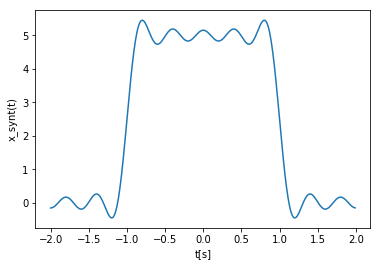

In [24]:
#synteza signalu z komplexnich koeficientu
x_synt_kkompl = 0
x_synt_kkompl = c_0_num
for kk in range(1,pocet_harmonickych):
    x_synt_kkompl +=(c_k.subs(k=-kk)*exp(-1j*2*np.pi*f_0_num*(-kk)*vektor_t)+c_k.subs(k=kk)*exp(-1j*2*np.pi*f_0_num*(kk)*vektor_t));
plt.plot(vektor_t,x_synt_kkompl)
plt.xlabel('t[s]')
plt.ylabel('x_synt(t)')

In [25]:
del x_synt_kkompl,c_kk_num,c_kk_num_angle,c_k

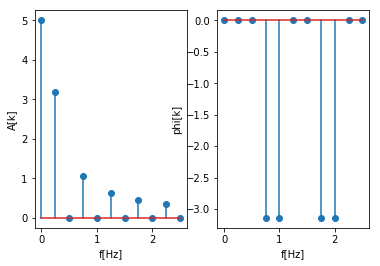

In [26]:
#Koeficienty Fourierovy rady v I. elektrotechnickem tvaru, a_k,b_k => phi_k
A_0 = a_0/2
A_k = sqrt(a_k^2+b_k^2)
A_kk_num = []
phi_k_num = []

for kk in vektor_k_num_real:
    if (kk==0):
        A_kk_num.append(abs(limit(A_k, k=kk)))
        phi_k_num.append(-arctan2(imag(limit(((a_k-(1j*b_k))/2), k=kk)),real(limit(((a_k-(1j*b_k))/2), k=kk))))
    else:
        A_kk_num.append(abs(A_k.substitute(k=kk)))
        phi_k_num.append(-arctan2(imag(((a_k-(1j*b_k))/2).substitute(k=kk)),real(((a_k-(1j*b_k))/2).substitute(k=kk))))
plt.subplot(121);
plt.xlabel('f[Hz]')
plt.ylabel('A[k]')
plt.stem(vektor_f_num_real, A_kk_num);
plt.subplot(122);
plt.xlabel('f[Hz]')
plt.ylabel('phi[k]')
plt.stem(vektor_f_num_real, phi_k_num);


Text(0,0.5,'x_synt(t)')

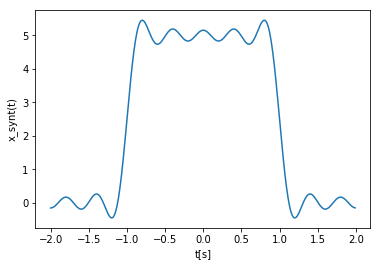

In [27]:
#synteza signalu z I. elektrotechnickeho tvaru
x_synt_elt = A_0
for kk in range(1,pocet_harmonickych):
    x_synt_elt = x_synt_elt + A_kk_num[kk] * cos(2*np.pi*f_0_num * kk *vektor_t - phi_k_num[kk])
plt.plot(vektor_t,x_synt_elt)
plt.xlabel('t[s]')
plt.ylabel('x_synt(t)')

In [28]:
del x_synt_elt,phi_k_num,A_kk_num,A_0,A_k

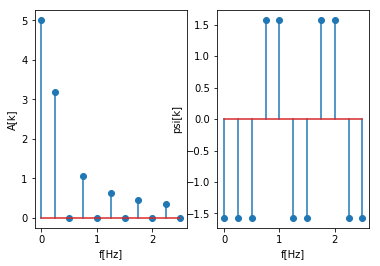

In [29]:
#II. elekt. tvar c_k => A_k, psi_k
A_0 = a_0 / 2
A_k = sqrt(a_k^2 + b_k^2)
A_kk_num = []
psi_k_num = []

for kk in vektor_k_num_real:
    if (kk==0):
        A_kk_num.append(limit(A_k, k=kk))
        psi_k_num.append(arctan2(imag(limit((b_k-1j*a_k), k=kk)),real(limit((b_k-1j*a_k), k=kk))))
    else:
        A_kk_num.append(A_k.substitute(k=kk))
        psi_k_num.append(arctan2(imag((b_k-1j*a_k).substitute(k=kk)),real((b_k-1j*a_k).substitute(k=kk))))
        
plt.subplot(121);
plt.xlabel('f[Hz]')
plt.ylabel('A[k]')
plt.stem(vektor_f_num_real, A_kk_num);
plt.subplot(122);
plt.xlabel('f[Hz]')
plt.ylabel('psi[k]')
plt.stem(vektor_f_num_real, psi_k_num);

Text(0,0.5,'x_synt(t)')

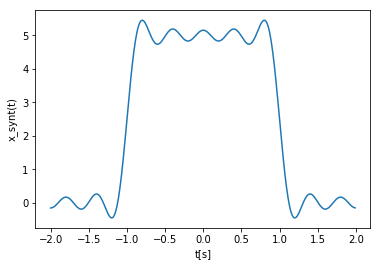

In [30]:

#synteza signalu z II. elkt. tvaru
x_synt_eltt = A_0
for kk in range(1,pocet_harmonickych+1):
    x_synt_eltt=x_synt_eltt+((A_kk_num[kk]) * sin(2*np.pi*f_0_num * kk * vektor_t - (psi_k_num[kk])))
plt.plot(vektor_t,x_synt_eltt)
plt.xlabel('t[s]')
plt.ylabel('x_synt(t)')